## Introduction
The business problem I decided to tackle was to figure out if there was any correlation between guns apprehended by the police in Rio de Janeiro and the amount of thefts, robberies, threats and reports to the police. I figured this would be an interesting problem to tackle as Rio de Janeiro is one of the most violent cities in the world and is famous for its police.

In my opinion many might be interested in the problem but most likely people involved with security of citizens in Rio de Janeiro, so police and politicians mostly.

## Data
The data I used was taken from the public security portal here Stats. The files I used were the top three, those are monthly statistics for almost all things public security related and then statistics for guns apprehended. All statistics I got went from 2003 all through 2019.

In [1]:
# File with all data public security related
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dfCisp = pd.read_csv('http://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', encoding = "ISO-8859-1", delimiter = ';')
dfCisp.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (26,30,37,45,46,47,49,50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CISP,mes,vano,mes_ano,AISP,RISP,munic,mcirc,Regiao,hom_doloso,...,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,0,...,0,0,0,0,0,66,5,1,578,3
1,4,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,...,0,1,0,0,3,51,9,1,441,3
2,5,1,2003,2003m1,5,1,Rio de Janeiro,3304557,Capital,3,...,1,0,0,0,3,64,11,5,637,3
3,6,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,6,...,1,0,0,0,6,56,27,6,473,3
4,7,1,2003,2003m1,1,1,Rio de Janeiro,3304557,Capital,4,...,3,0,0,0,4,5,23,1,147,3


In [2]:
# Guns from 2000-2006
dfA1 = pd.read_csv('http://www.ispdados.rj.gov.br/Arquivos/ArmasEstado2000_2006.csv', encoding = "ISO-8859-1", delimiter = ';')
dfA1.head()

,vano,mes,armas_apreendidas
0,2000,1,697
1,2000,2,751
2,2000,3,784
3,2000,4,780
4,2000,5,761


In [3]:
# Guns from 2006-2019 (categorized)
dfGuns = pd.read_excel('http://www.ispdados.rj.gov.br/Arquivos/ArmasApreendidasEvolucaoCisp.xlsx', index_col = 0, sheet_name = "Arma_de_Fogo")
dfGuns.head()

,mes,vano,aisp,risp,arma_fabricacao_caseira,carabina,espingarda,fuzil,garrucha,garruchao,metralhadora,outros,pistola,revolver,submetralhadora,total
circ,,,,,,,,,,,,,,,,
1,1,2007,5,1,0,0,0,0,0,0,0,0,0,2,0,2
1,2,2007,5,1,0,0,0,0,0,0,0,0,0,1,0,1
1,3,2007,5,1,0,0,0,0,0,0,0,0,0,0,0,0
1,4,2007,5,1,0,0,0,0,0,0,0,1,4,1,0,6
1,5,2007,5,1,0,0,0,0,6,0,0,0,1,2,0,9


The data was cleaned up and most of the columns left out. I only used total number of guns to have the guns apprehended databases the same. In all stats I removed most of the columns, only keeping the total number of thefts, robberies, threats and reports.

In [4]:
# Clean unnecessary columns
dfA2 = dfGuns.drop(['aisp', 'risp', 'arma_fabricacao_caseira', 'carabina',
       'espingarda', 'fuzil', 'garrucha', 'garruchao', 'metralhadora',
       'outros', 'pistola', 'revolver', 'submetralhadora'], axis=1)

# Clean the database and set up total number of guns
dfA1.columns = ['Year', 'Month', 'Guns']
dfA2.columns = ['Month', 'Year', 'Guns']
dfA2 = dfA2.groupby(['Year','Month']).sum()
dfA2.reset_index(inplace = True)

# Join the guns databases
dfA = dfA1.append(dfA2)
dfA.head()

,Year,Month,Guns
0,2000,1,697
1,2000,2,751
2,2000,3,784
3,2000,4,780
4,2000,5,761


In [20]:
# Drop unnecessary columns
dfC = dfCisp.drop(['CISP', 'mes_ano', 'munic', 'AISP', 'RISP', 'mcirc', 'cmp', 'cmba', 'aaapai', 'apf', 'roubo_comercio', 'roubo_residencia',
       'roubo_veiculo', 'roubo_carga', 'roubo_transeunte', 'roubo_em_coletivo',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_celular',
       'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta',
       'outros_roubos', 'furto_veiculos', 'furto_transeunte',
       'furto_coletivo', 'furto_celular', 'furto_bicicleta', 'outros_furtos', 
        'sequestro', 'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'fase', 'pessoas_desaparecidas',
       'encontro_cadaver', 'encontro_ossada', 'pol_militares_mortos_serv',
       'pol_civis_mortos_serv', 'hom_doloso', 'lesao_corp_morte',
       'latrocinio', 'hom_por_interv_policial', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
        'indicador_cvli','indicador_roubo_carga', 'indicador_roubo_rua', 'indicador_roubo_veic', 'Regiao','letalidade_violenta'], axis=1)


#Rename columns
dfC.columns = ['Month', 'Year', 'Robberies', 'Thefts', 'Threats','Reports']

#Group together stats from different areas
dfC = dfC.groupby(['Year', 'Month']).sum()
dfC.reset_index(inplace = True)

dfC.head()

,Year,Month,Robberies,Thefts,Threats,Reports
0,2003,1,10296,10483,6127,44793
1,2003,2,10634,10335,6047,45403
2,2003,3,9976,10976,5793,45417
3,2003,4,10222,10409,5626,44184
4,2003,5,10875,10414,5436,45572


In [21]:
# Join the databases for final database for analysis
df = pd.merge(dfC, dfA, on=['Year', 'Month'])
df.head()

,Year,Month,Robberies,Thefts,Threats,Reports,Guns
0,2003,1,10296,10483,6127,44793,1154
1,2003,2,10634,10335,6047,45403,1324
2,2003,3,9976,10976,5793,45417,1344
3,2003,4,10222,10409,5626,44184,1336
4,2003,5,10875,10414,5436,45572,1292


## Methodology
#### Use regression to figure out a connection between guns apprehended and crimes

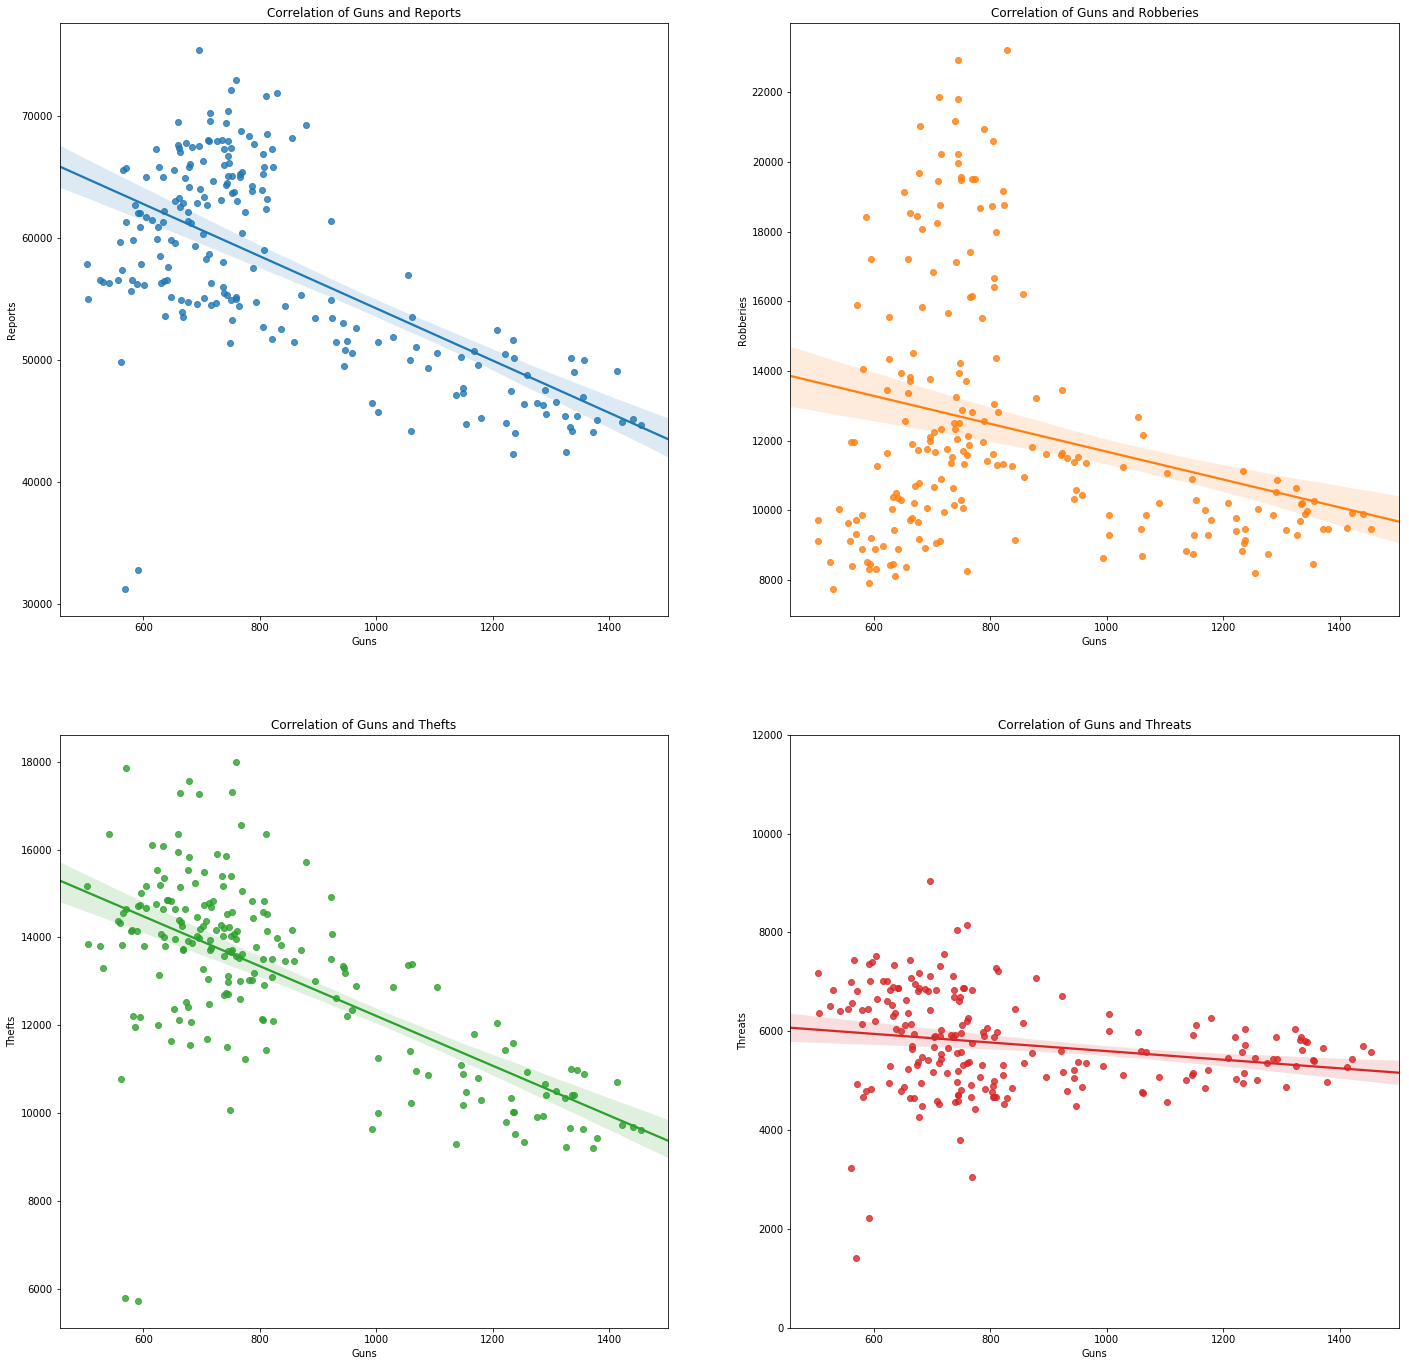

In [22]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

# Plot the regression plot for Guns and Thefts
# Plot the variables each on its own plot

fig = plt.figure(figsize = (24,24)) # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4

# Subplot 1: Guns apprehended
sns.regplot(x="Guns", y="Reports", data=df, ax=ax0)
plt.ylim(0,)
ax0.set_title('Correlation of Guns and Reports')
ax0.set_xlabel('Guns')
ax0.set_ylabel('Reports')

# Subplot 2: Robberies reported
sns.regplot(x="Guns", y="Robberies", data=df, ax=ax1)
plt.ylim(0,)
ax1.set_title('Correlation of Guns and Robberies')
ax1.set_xlabel('Guns')
ax1.set_ylabel('Robberies')

# Subplot 3: Thefts reported
sns.regplot(x="Guns", y="Thefts", data=df, ax=ax2)
plt.ylim(0,)
ax2.set_title('Correlation of Guns and Thefts')
ax2.set_xlabel('Guns')
ax2.set_ylabel('Thefts')

# Subplot 4: Threats reported
sns.regplot(x="Guns", y="Threats", data=df, ax=ax3)
plt.ylim(0,12000)
ax3.set_title('Correlation of Guns and Threats')
ax3.set_xlabel('Guns')
ax3.set_ylabel('Threats')

plt.show()

There is an obvious correlation between the apprehension of guns and crimes committed. There is a negative line which means that the more guns are apprehended the fewer crimes are committed, which was to be expected. To be sure we will check out the correlation between all variables

In [23]:
df[['Robberies', 'Thefts', 'Threats','Reports','Guns']].corr()

,Robberies,Thefts,Threats,Reports,Guns
Robberies,1.000000,0.092167,-0.383040,0.644340,-0.263037
Thefts,0.092167,1.000000,0.623377,0.717594,-0.658897
Threats,-0.383040,0.623377,1.000000,0.334571,-0.210994
Reports,0.644340,0.717594,0.334571,1.000000,-0.631991
Guns,-0.263037,-0.658897,-0.210994,-0.631991,1.000000



We'll plot up the variables to see if there is an obvious visual correlation

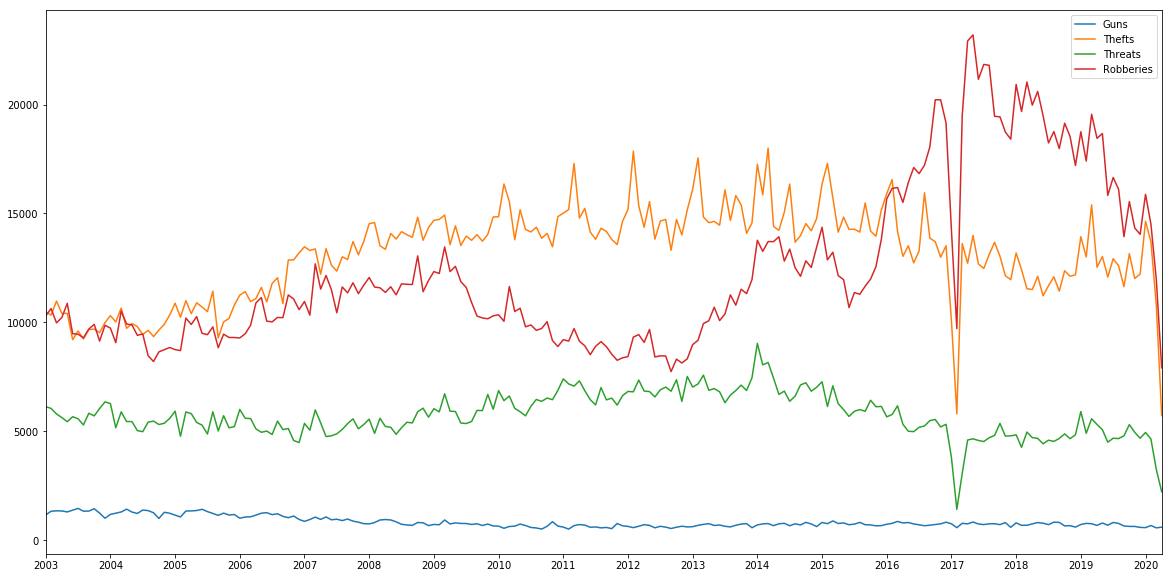

In [24]:
# Plot all variables on the same plot
df[['Guns','Thefts', 'Threats', 'Robberies']].plot(figsize=(20, 10))
unique_years, ind = np.unique(df["Year"].values,return_index=True)
plt.xticks(df.index[ind], unique_years)
plt.show()


It is possible to see an obvious curve on crimes committed but it's not as easy to see change in guns apprehended so we'll plot it on individual graphs

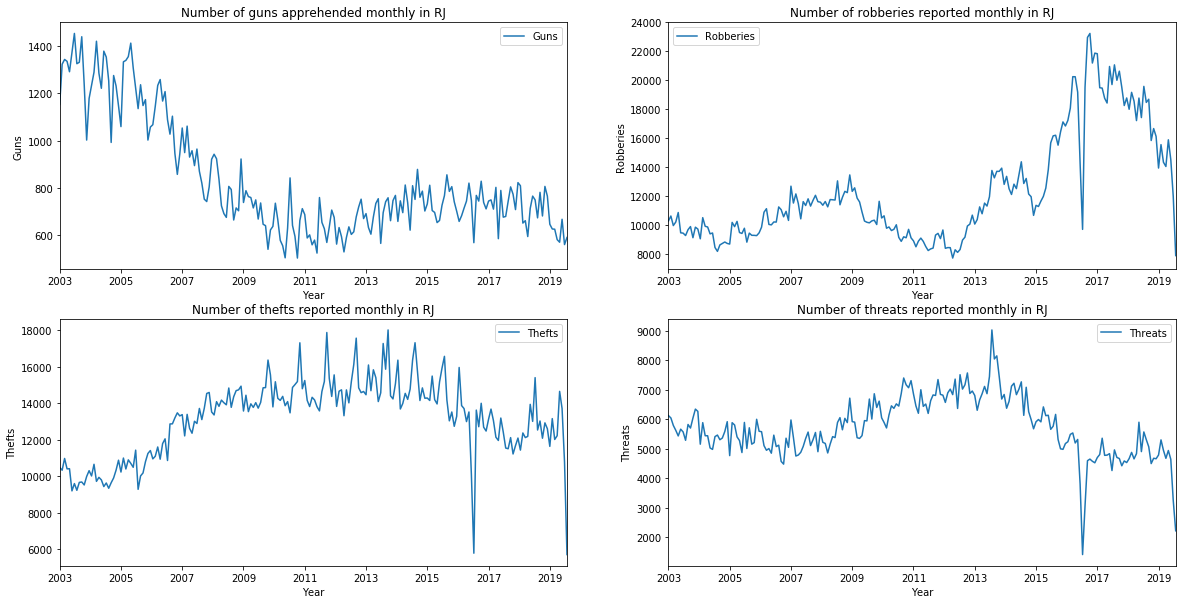

In [25]:
# Plot the variables each on its own plot

fig = plt.figure() # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4
years = [2003,2005,2007,2009,2011,2013,2015,2017,2019]

# Subplot 1: Guns apprehended
df[['Guns']].plot(figsize=(20, 10), ax=ax0)
ax0.set_title('Number of guns apprehended monthly in RJ')
ax0.set_xlabel('Year')
ax0.set_ylabel('Guns')

# Subplot 2: Robberies reported
df[['Robberies']].plot(figsize=(20, 10), ax=ax1)
ax1.set_title('Number of robberies reported monthly in RJ')
ax1.set_xlabel('Year')
ax1.set_ylabel('Robberies')

# Subplot 3: Thefts reported
df[['Thefts']].plot(figsize=(20, 10), ax=ax2)
ax2.set_title('Number of thefts reported monthly in RJ')
ax2.set_xlabel('Year')
ax2.set_ylabel('Thefts')

# Subplot 4: Threats reported
df[['Threats']].plot(figsize=(20, 10), ax=ax3)
ax3.set_title('Number of threats reported monthly in RJ')
ax3.set_xlabel('Year')
ax3.set_ylabel('Threats')


ax0.set_xticklabels(years)
ax1.set_xticklabels(years)
ax2.set_xticklabels(years)
ax3.set_xticklabels(years)



plt.show()


Now we can see the visual correlation that when gun apprehension was very high in the early 2000's crime rate was lower. When gun apprehension went down, crime rate went up. We'll explore it a bit further.

In [26]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['Guns'], df['Thefts'])
print("The Pearson Correlation Coefficient for Theft is", pearson_coef, " with a P-value of P = ", p_value)  
pearson_coef, p_value = stats.pearsonr(df['Guns'], df['Threats'])
print("The Pearson Correlation Coefficient for Threats is", pearson_coef, " with a P-value of P = ", p_value)  
pearson_coef, p_value = stats.pearsonr(df['Guns'], df['Robberies'])
print("The Pearson Correlation Coefficient for Robberies is", pearson_coef, " with a P-value of P = ", p_value)  
pearson_coef, p_value = stats.pearsonr(df['Guns'], df['Reports'])
print("The Pearson Correlation Coefficient for Reports is", pearson_coef, " with a P-value of P = ", p_value)

The Pearson Correlation Coefficient for Theft is -0.6588965668062553  with a P-value of P =  2.8290313996322107e-27
The Pearson Correlation Coefficient for Threats is -0.21099421376205996  with a P-value of P =  0.002219450738774957
The Pearson Correlation Coefficient for Robberies is -0.2630369953342921  with a P-value of P =  0.00012377461413354745
The Pearson Correlation Coefficient for Reports is -0.6319906196361725  with a P-value of P =  1.3616569671622424e-24



#### The P-Value is very good for Thefts and for Reports but not very good for Threats and Robberies.

#### We'll next try to use the Single Linear Regression Machine Learning Technique


## RESULTS

Theft Mean absolute error: 1261.09
Theft Residual sum of squares (MSE): 2726800.33
Theft R2-score: -0.37
Reports Mean absolute error: 5350.03
Reports Residual sum of squares (MSE): 41691917.00
Reports R2-score: -0.60
Robbery Mean absolute error: 3291.02
Robbery Residual sum of squares (MSE): 19363266.91
Robbery R2-score: -21.44
Threat Mean absolute error: 842.58
Threat Residual sum of squares (MSE): 1100949.36
Threat R2-score: -22.41


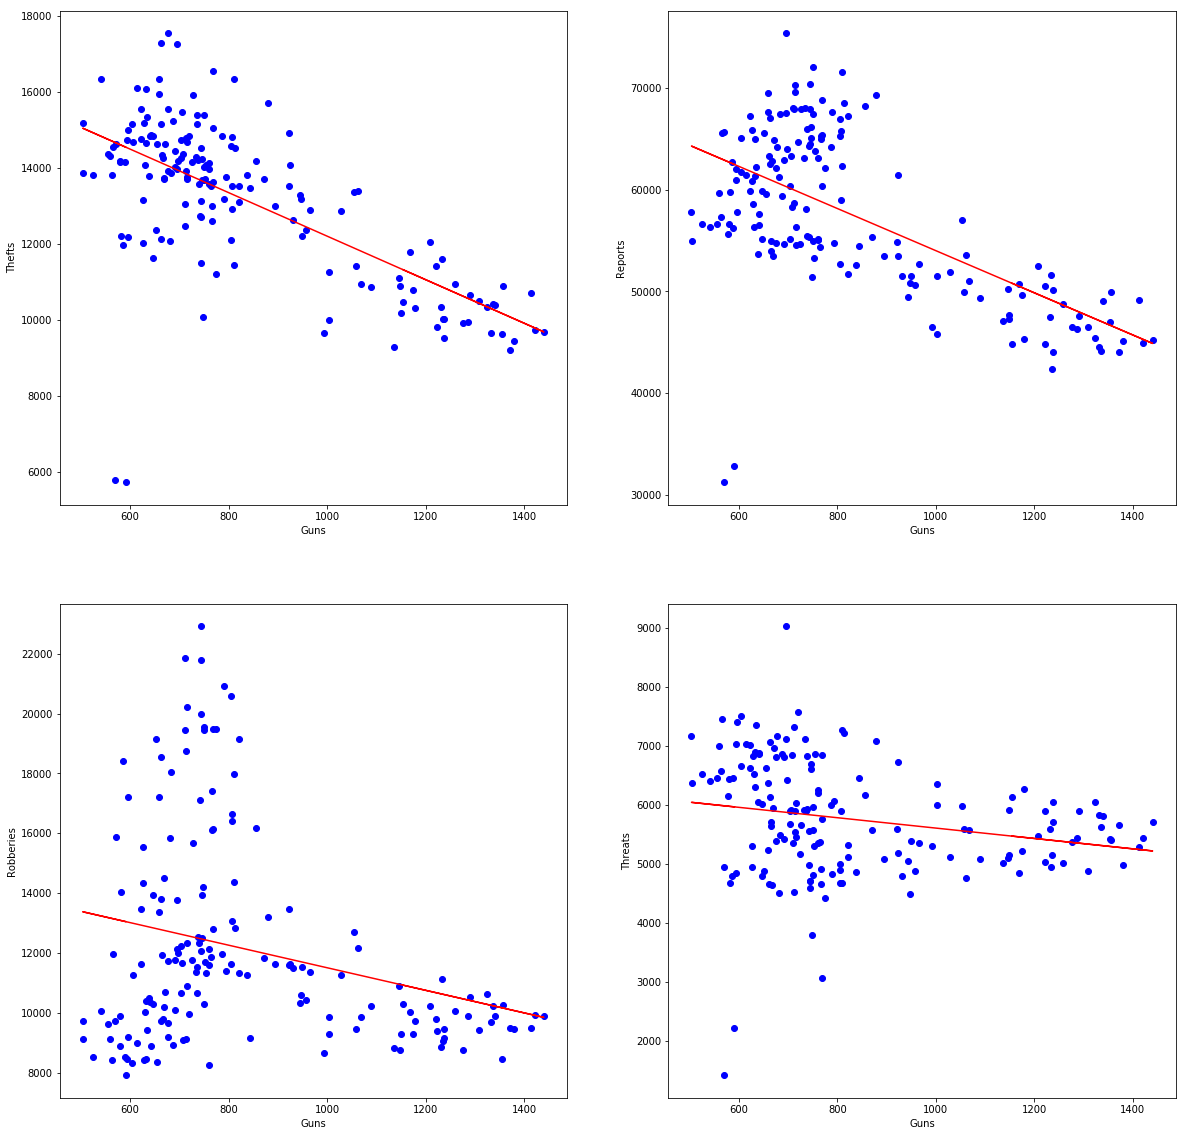

In [27]:
# Split data into test and train set, fit the data and plot regression plots.
from sklearn import linear_model
from sklearn.metrics import r2_score



msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

fig = plt.figure(figsize=(20,20)) # create figure

ax0 = fig.add_subplot(2, 2, 1) # add subplot 1
ax1 = fig.add_subplot(2, 2, 2) # add subplot 2
ax2 = fig.add_subplot(2, 2, 3) # add subplot 3
ax3 = fig.add_subplot(2, 2, 4) # add subplot 4
regr = linear_model.LinearRegression()



# Subplot 1: Guns and Thefts
train_x = np.asanyarray(train[['Guns']])
train_y = np.asanyarray(train[['Thefts']])
regr.fit (train_x, train_y)

test_x = np.asanyarray(test[['Guns']])
test_y = np.asanyarray(test[['Thefts']])
test_y_hat = regr.predict(test_x)

print("Theft Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Theft Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("Theft R2-score: %.2f" % r2_score(test_y_hat , test_y) )

ax0.scatter(train.Guns, train.Thefts,  color='blue')
ax0.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
ax0.set_xlabel("Guns")
ax0.set_ylabel("Thefts")


# Subplot 2: Guns and Reports
train_x = np.asanyarray(train[['Guns']])
train_y = np.asanyarray(train[['Reports']])
regr.fit (train_x, train_y)

test_x = np.asanyarray(test[['Guns']])
test_y = np.asanyarray(test[['Reports']])
test_y_hat = regr.predict(test_x)

print("Reports Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Reports Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("Reports R2-score: %.2f" % r2_score(test_y_hat , test_y) )

ax1.scatter(train.Guns, train.Reports,  color='blue')
ax1.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
ax1.set_xlabel("Guns")
ax1.set_ylabel("Reports")


# Subplot 3: Guns and Robberies
train_x = np.asanyarray(train[['Guns']])
train_y = np.asanyarray(train[['Robberies']])
regr.fit (train_x, train_y)

test_x = np.asanyarray(test[['Guns']])
test_y = np.asanyarray(test[['Robberies']])
test_y_hat = regr.predict(test_x)

print("Robbery Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Robbery Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("Robbery R2-score: %.2f" % r2_score(test_y_hat , test_y) )

ax2.scatter(train.Guns, train.Robberies,  color='blue')
ax2.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
ax2.set_xlabel("Guns")
ax2.set_ylabel("Robberies")


# Subplot 4: Guns and Threats
train_x = np.asanyarray(train[['Guns']])
train_y = np.asanyarray(train[['Threats']])
regr.fit (train_x, train_y)

test_x = np.asanyarray(test[['Guns']])
test_y = np.asanyarray(test[['Threats']])
test_y_hat = regr.predict(test_x)

print("Threat Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Threat Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("Threat R2-score: %.2f" % r2_score(test_y_hat , test_y) )

ax3.scatter(train.Guns, train.Threats,  color='blue')
ax3.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
ax3.set_xlabel("Guns")
ax3.set_ylabel("Threats")



plt.show()

The results were a good correlation for Thefts and Reports. But not as good for robberies and threats.

The results show a correlation and do give a decent estimation with the learned formula from the single linear regression.

## Discussion
There was a correlation with guns apprehended and crimes committed in Rio de Janeiro but the results did still not confirm my suspicion in all areas as I had initally expected. There is definitely room for improvement, possibilities to check the data with other ML techniques as well as getting data from other times as well as looking at other crimes committed. The dataset seemed mostly good except a fall in the beginning of 2017 of crimes committed which may have affected the learning a bit. I think this is definitely a problem worth looking into but it does seem like an obvious answer, that if police is working harder on cleaning the street of guns (instead of politicians pushing guns into everyones hands), crime rate will go down.

It would also be interesting to compare the data with other states/cities and also it would be interesting to include police mortality in the numbers as gun apprehension can be a dangerous feat.

## Conclusion
In this study, I analyzed the relationship between guns apprehended by police in Rio de Janeiro and the effect on crimes committed in the city. I set up the dataset with total number of crimes and guns apprehended and analyzed it. I built both regression models and classification models to predict whether gun apprehension had any effect on crime rate. These models can be useful in helping police force focus their attention.